In [96]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

In [97]:
from keras.models import load_model

In [98]:
model=load_model('/home/ai-ee/Desktop/SS/practice/cats_and_dogs_small_2.h5')

In [99]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 15, 15, 128)       147584    
__________

In [100]:
img_path='/home/ai-ee/Downloads/cats_and_dogs_small/test/cats/cat.1700.jpg'

In [101]:
from keras.preprocessing import image
import numpy as np

In [102]:
img=image.load_img(img_path,target_size=(150,150))

In [103]:
img_tensor=image.img_to_array(img)

In [104]:
img_tensor=np.expand_dims(img_tensor,axis=0)

In [105]:
img_tensor/=255.

In [106]:
print(img_tensor.shape)

(1, 150, 150, 3)


In [107]:
import matplotlib.pyplot as plt

In [108]:
#plt.imshow(img_tensor[0])
#plt.show()

In [109]:
from keras import models

In [111]:
# extracts the outputs of top 8 layers
#print(model.layers[:8])
layer_outputs=[layer.output for layer in model.layers[:8]]
#print(layer_outputs)

In [112]:
activation_model=models.Model(inputs=model.input,outputs=layer_outputs)

In [113]:
## one input and 8 outputs
activations=activation_model.predict(img_tensor)

In [114]:
first_layer_activation=activations[0]
print(first_layer_activation.shape)

(1, 148, 148, 32)


In [115]:
import matplotlib.pyplot as plt

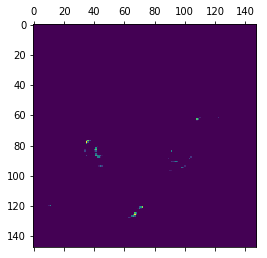

In [116]:
plt.matshow(first_layer_activation[0,:,:,7],cmap='viridis')

In [117]:
# visualizing every channel in every intermediate activation

layer_names: ['conv2d_13', 'max_pooling2d_13', 'conv2d_14', 'max_pooling2d_14', 'conv2d_15', 'max_pooling2d_15', 'conv2d_16', 'max_pooling2d_16']


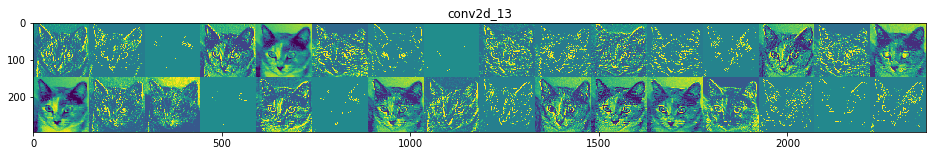

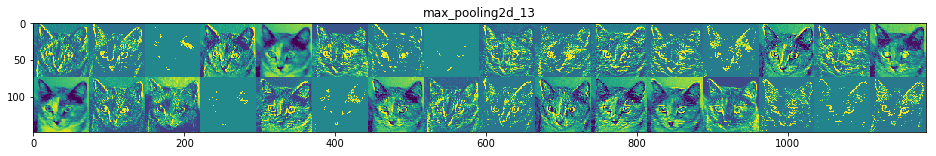

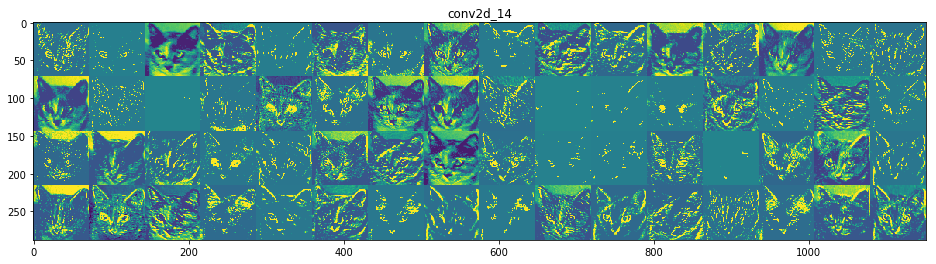

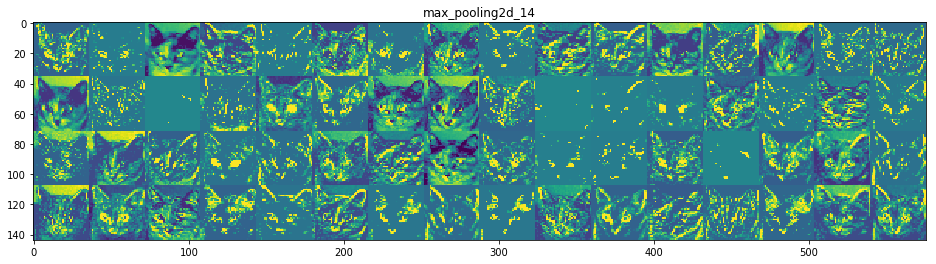

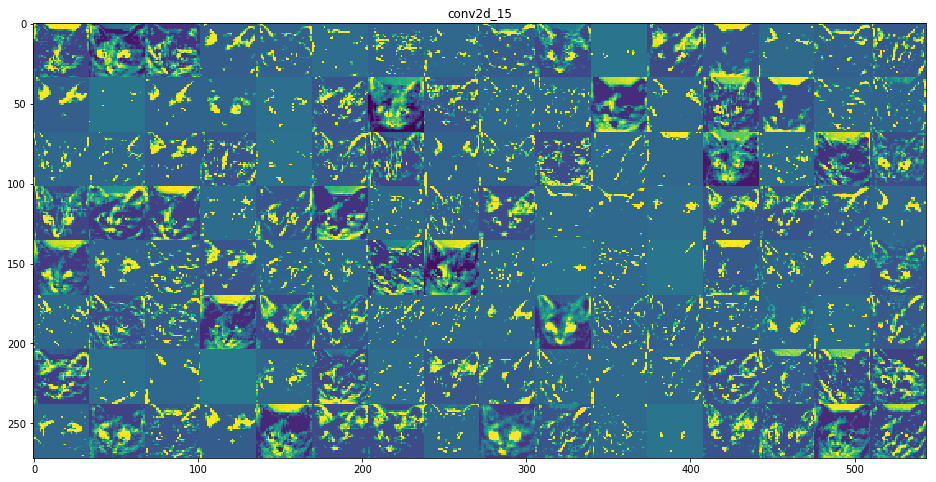

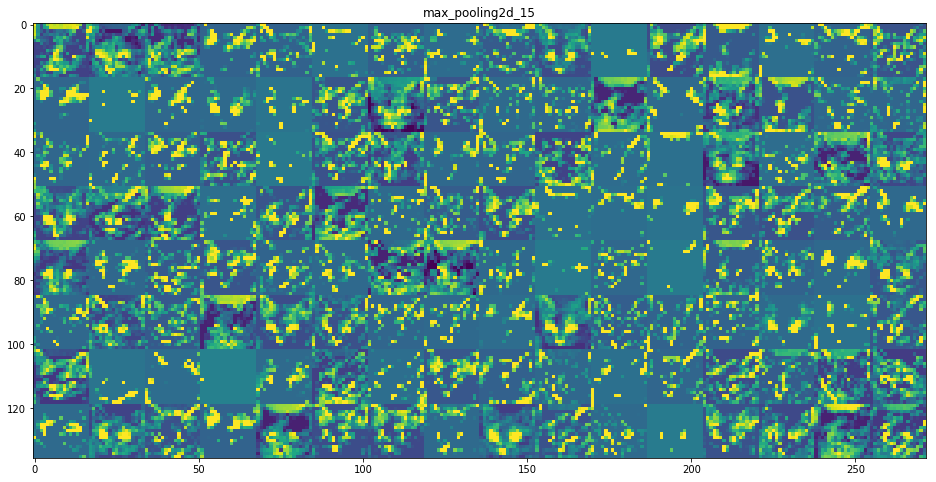

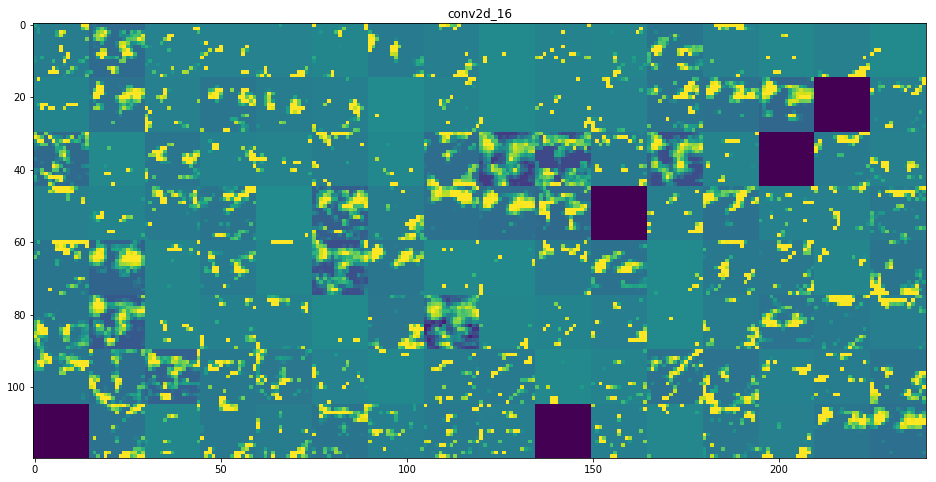

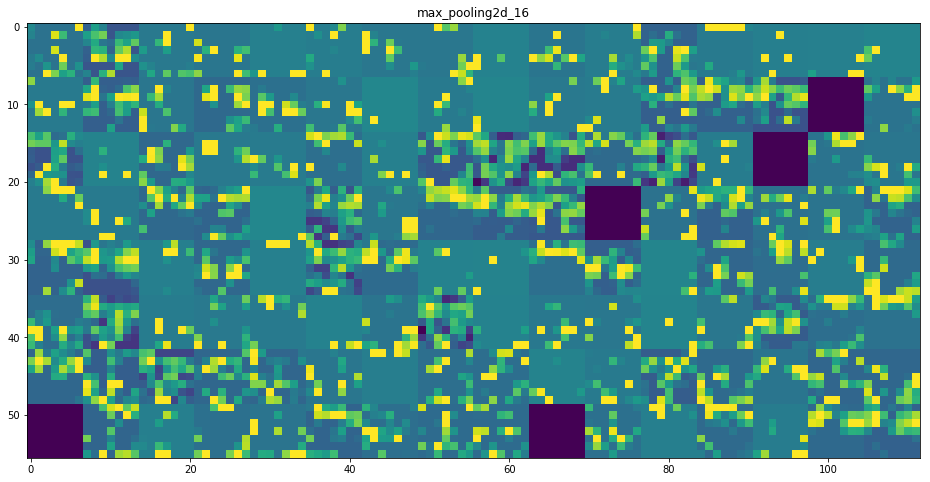

In [141]:
layer_names=[]
for layer in model.layers[:8]:
    layer_names.append(layer.name)
    
print('layer_names:',layer_names)

images_per_row=16
#print(layer_names)
#print(activations)
for layer_name,layer_activation in zip(layer_names,activations):
    n_features=layer_activation.shape[-1]
    size=layer_activation.shape[1]
    n_cols=n_features//images_per_row
    display_grid=np.zeros((size*n_cols,images_per_row*size))
    for col in range(n_cols):
        for row in range(images_per_row):
            channel_image=layer_activation[0,:,:,col*images_per_row+row]
            channel_image-=channel_image.mean()
            channel_image/=channel_image.std()
            channel_image*=64
            channel_image+=128
            channel_image=np.clip(channel_image,0,255).astype('uint8')
            display_grid[col*size:(col+1)*size,row*size:(row+1)*size]=channel_image
    scale=1./size
    plt.figure(figsize=(scale*display_grid.shape[1],scale*display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid,aspect='auto',cmap='viridis')